In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importer les fichiers

In [3]:
df = pd.read_csv('./test.csv',header=6)
print('Data Shape : ',df.shape)
mtx = pd.read_csv('./mtx.csv',header=6)
print('mtx table Shape : ',mtx.shape)
inflix = pd.read_csv('./Infliximab.csv',header=6)
print('infliximab table Shape : ',inflix.shape)
toliz = pd.read_csv('./tolizumab.csv',header=6)
print('tolizumab table Shape : ',toliz.shape)

Data Shape :  (405405, 18)
mtx table Shape :  (729729, 21)
infliximab table Shape :  (729729, 21)
tolizumab table Shape :  (729729, 21)


### Renommer les colonnes :

In [4]:
df=df.rename(columns={
    "[run number]": "experNumber",
    "MacrophageActivation": "MacroAct",
    "FibroblasteActivation":"FibroAct",
    "OsteoclasteActivation":"OsteocAct",
    "ChondrocyteActivation":"ChondroAct",
    "(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad",
    "(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad",
    "(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad",
    "[step]":"step",
    "nb-macrophage":"nbMacrophage",
    "count RANKLs":"countRANKLs",
    "count macrophages":"countMacrophages"
})

mtx=mtx.rename(columns={
    "[run number]": "experNumber",
    "MacrophageActivation": "MacroAct",
    "FibroblasteActivation":"FibroAct",
    "OsteoclasteActivation":"OsteocAct",
    "ChondrocyteActivation":"ChondroAct",
    "(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad",
    "(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad",
    "(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad",
    "[step]":"step","Dose-MTX":"MtxDose",
    "nb-macrophage":"nbMacrophage",
    "count RANKLs":"countRANKLs",
    "count macrophages":"countMacrophages",
    "count MTXs":"countMTXs","count TNF_as":"countTNF",
    "count IL_6s":"countIL6",
    "count chemokines":"countChemokines",
    "count MMPs":"countMMPs"
})

inflix=inflix.rename(columns={
    "[run number]": "experNumber",
    "MacrophageActivation": "MacroAct",
    "FibroblasteActivation":"FibroAct",
    "OsteoclasteActivation":"OsteocAct",
    "ChondrocyteActivation":"ChondroAct",
    "(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad","(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad",
    "(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad",
    "[step]":"step",
    "nb-macrophage":"nbMacrophage",
    "count RANKLs":"countRANKLs",
    "count RANKLs":"countRANKLs","count macrophages":"countMacrophages",
    "count Infliximabs":"countInfliximabs",
    "count TNF_as":"countTNF",
    "count IL_6s":"countIL6"
})

toliz=toliz.rename(columns={
    "[run number]": "experNumber",
    "MacrophageActivation": "MacroAct",
    "FibroblasteActivation":"FibroAct",
    "OsteoclasteActivation":"OsteocAct",
    "ChondrocyteActivation":"ChondroAct",
    "(count patches with [type-patch = \"membraneSynovial\" and pcolor = red] / count patches with [type-patch = \"membraneSynovial\"]) * 100":"MembranDegrad",
    "(1 - ((count patches with [pcolor > 5 and type-patch = \"os\"])/(count patches with [type-patch = \"os\"]))) * 100":"OsDegrad",
    "(1 -((count patches with [type-patch = \"cartilage\"]) / 419)) * 100":"CartilageDegrad",
    "[step]":"step",
    "nb-macrophage":"nbMacrophage",
    "count RANKLs":"countRANKLs",
    "count macrophages":"countMacrophages",
    "count tolizumabs":"countTolizumabs",
    "count chemokines":"countChemokines",
    "count MMPs":"countMMPs",
    "count TNF_as":"countTNF",
    "count IL_6s":"countIL6"
})

### Trier les lignes selon le numéro de l'experience et l'ordre chronologique  

In [5]:
df=df.sort_values(by=['experNumber','step'])
mtx=mtx.sort_values(by=['experNumber','step'])
inflix=inflix.sort_values(by=['experNumber','step'])
toliz=toliz.sort_values(by=['experNumber','step'])

#### Exporter les nouvelles tables

In [6]:
# df.to_csv('./df.csv', index=False)
# mtx.to_csv('./mtx.csv', index=False)
# inflix.to_csv('./inflix.csv', index=False)
# toliz.to_csv('./toliz.csv', index=False)

# 1)  MTX

Normaliser les données pour RANKLs, Chemokines et MMPs pour les afficher dans le méme graphe avec Macrophages, il6 et tnf-a

In [10]:
mtx.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,MtxDose,MTX-Act,...,countIL6,countTNF,countMMPs,countMTXs,countMacrophages,countChemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.00000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.00000,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,5.00000,52.000000,...,6.900759,15.081706,246.797123,5.00000,6.376263,131.317423,191.997055,7.220281,0.027171,0.729088
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,3.74166,37.478909,...,15.713866,35.809084,826.976028,3.74166,5.042068,330.460227,581.635317,8.314578,0.737476,6.388359
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.00000,10.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.00000,10.000000,...,1.000000,2.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,4.00000,45.000000,...,3.000000,7.000000,12.000000,4.00000,6.000000,42.000000,39.000000,4.940120,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,10.00000,101.000000,...,5.000000,11.000000,194.000000,10.00000,11.000000,94.000000,108.000000,10.479042,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,10.00000,101.000000,...,212.000000,529.000000,22897.000000,10.00000,15.000000,5401.000000,12178.000000,39.071856,47.023296,95.465394


### Normalisation des données (MTX)

In [11]:
mtx['countMMPs'] = mtx['countMMPs']/mtx['countMMPs'].mean()
mtx['countRANKLs'] = mtx['countRANKLs']/mtx['countRANKLs'].mean()
mtx['countChemokines'] = mtx['countChemokines']/mtx['countChemokines'].mean()

Traiter tout les cas possible sachant qu'on a 3 valeurs pour la dose ( 1,4,10) et 3 valeurs pour l'activation (10,45,101)

In [12]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=mtx[(mtx.experNumber == 1)]
## cas dose :4 et activation 45 ( experience numero 50) 
exper50=mtx[(mtx.experNumber == 50)]
## cas dose :10 et activation 101 ( experience numero 153) 
exper153=mtx[(mtx.experNumber == 153)]


##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 128)
exper128=mtx[(mtx.experNumber == 128)]

## cas dose :1 et activation 101 ( experience numero 138) 
exper138=mtx[(mtx.experNumber == 138)]

## cas dose :4 et activation 10 ( experience numero 247) 
exper247=mtx[(mtx.experNumber == 247)]

## cas dose :4 et activation 101 ( experience numero 537) 
exper537=mtx[(mtx.experNumber == 537)]

## cas dose :10 et activation 10 ( experience numero 133) 
exper133=mtx[(mtx.experNumber == 133)]

## cas dose :10 et activation 45 ( experience numero 350) 
exper350=mtx[(mtx.experNumber == 350)]

# Experience 1 :

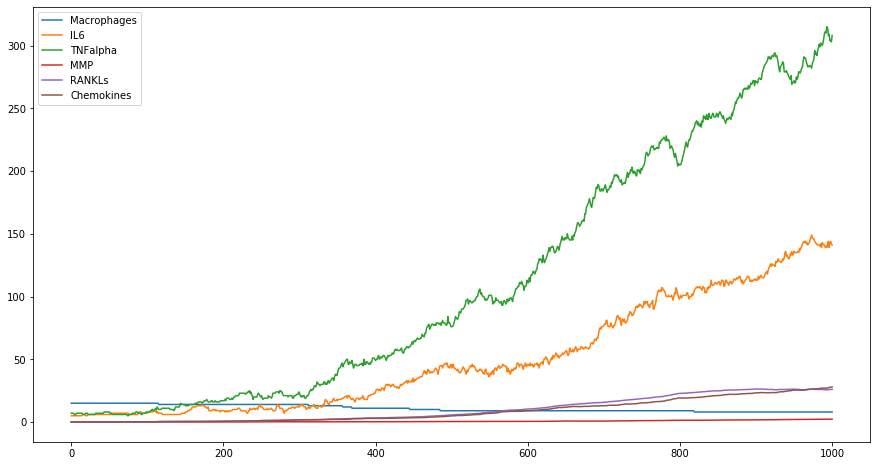

In [13]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countMacrophages,label="Macrophages")
plt.plot(exper1.step,exper1.countIL6,label="IL6")
plt.plot(exper1.step,exper1.countTNF,label="TNFalpha")
plt.plot(exper1.step,exper1.countMMPs,label="MMP")

plt.plot(exper1.step,exper1.countRANKLs,label="RANKLs")
plt.plot(exper1.step,exper1.countChemokines,label="Chemokines")
plt.legend()

plt.show()

# Experience 50 :

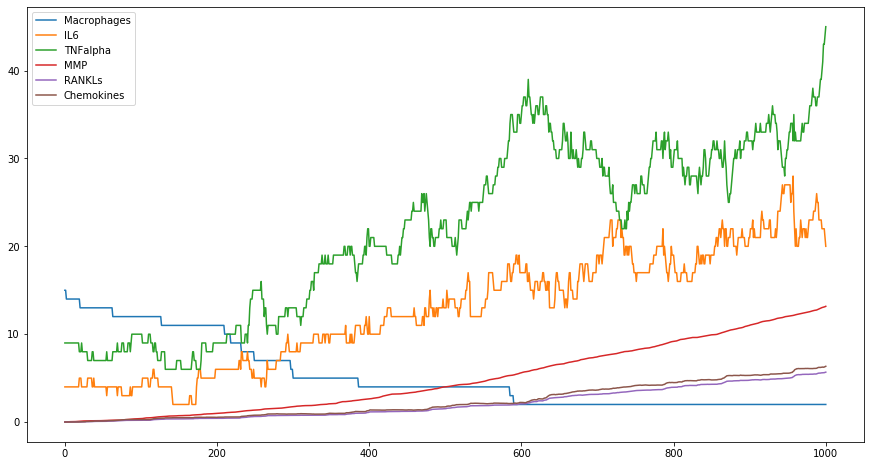

In [14]:
plt.figure(figsize=(15,8))

plt.plot(exper50.step,exper50.countMacrophages,label="Macrophages")
plt.plot(exper50.step,exper50.countIL6,label="IL6")
plt.plot(exper50.step,exper50.countTNF,label="TNFalpha")
plt.plot(exper50.step,exper50.countMMPs,label="MMP")

plt.plot(exper50.step,exper50.countRANKLs,label="RANKLs")
plt.plot(exper50.step,exper50.countChemokines,label="Chemokines")
plt.legend()

plt.show()

# Experience 153 :

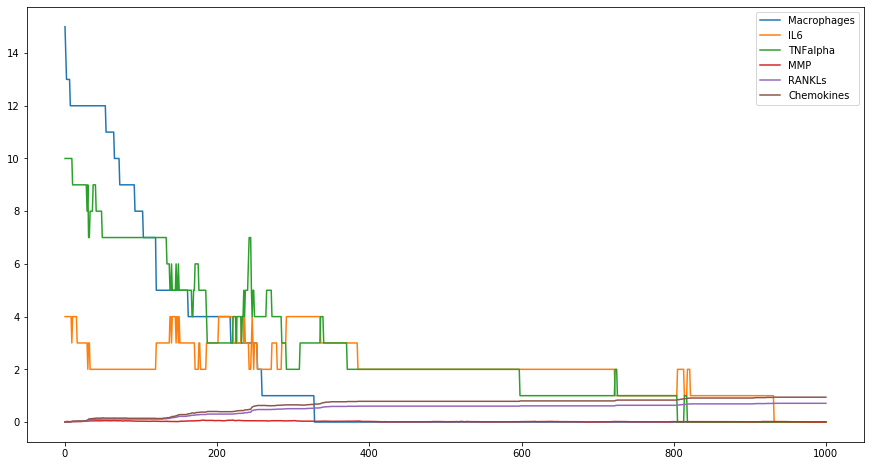

In [11]:
plt.figure(figsize=(15,8))

plt.plot(exper153.step,exper153.countMacrophages,label="Macrophages")
plt.plot(exper153.step,exper153.countIL6,label="IL6")
plt.plot(exper153.step,exper153.countTNF,label="TNFalpha")
plt.plot(exper153.step,exper153.countMMPs,label="MMP")

plt.plot(exper153.step,exper153.countRANKLs,label="RANKLs")
plt.plot(exper153.step,exper153.countChemokines,label="Chemokines")
plt.legend()

plt.show()

## visualiser l'inflammation des 3 experiences

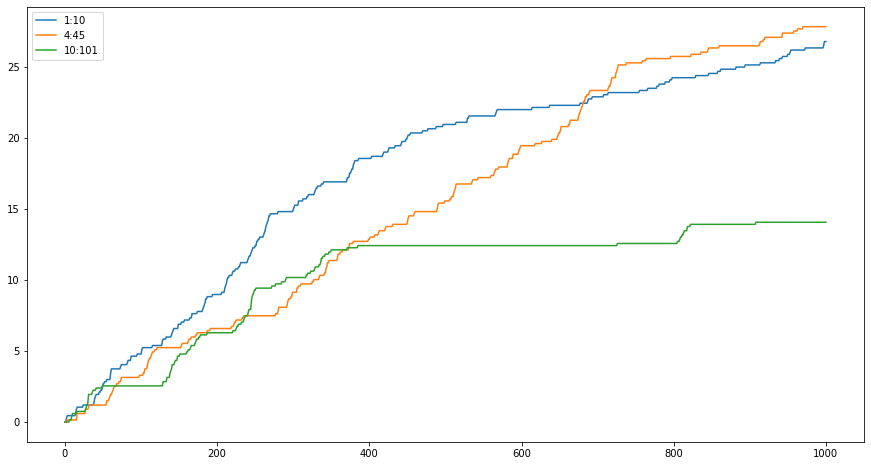

In [12]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper50.step,exper50.MembranDegrad,label="4:45")
plt.plot(exper153.step,exper153.MembranDegrad,label="10:101")
plt.legend()

plt.show()

## Visualiser la degradation de l'OS pour les 3 experiences

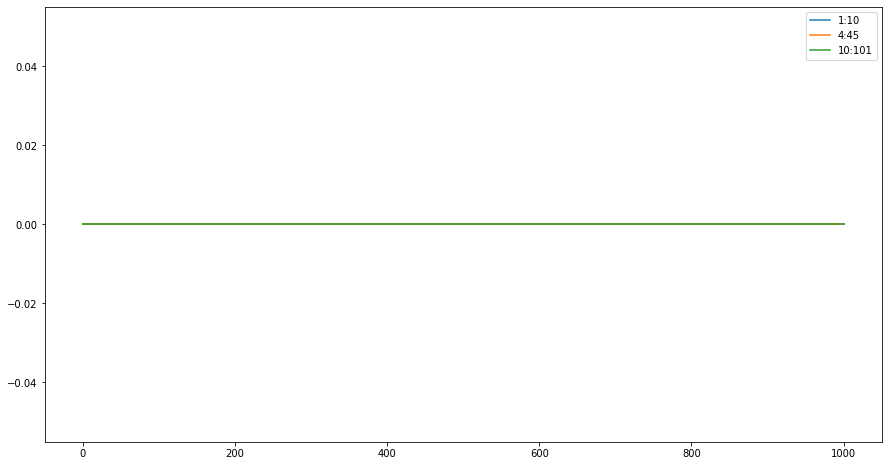

In [13]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper50.step,exper50.OsDegrad,label="4:45")
plt.plot(exper153.step,exper153.OsDegrad,label="10:101")
plt.legend()

plt.show()

Nous remarquons que la courbe de degradation de l'os est une droite parallele a l'axe des abscisses, ça valeur ne change pas car le nombre d'iterations (1000) n'est pas suffisant.

## Visualiser la degradation du cartilage pour les 3 experiences

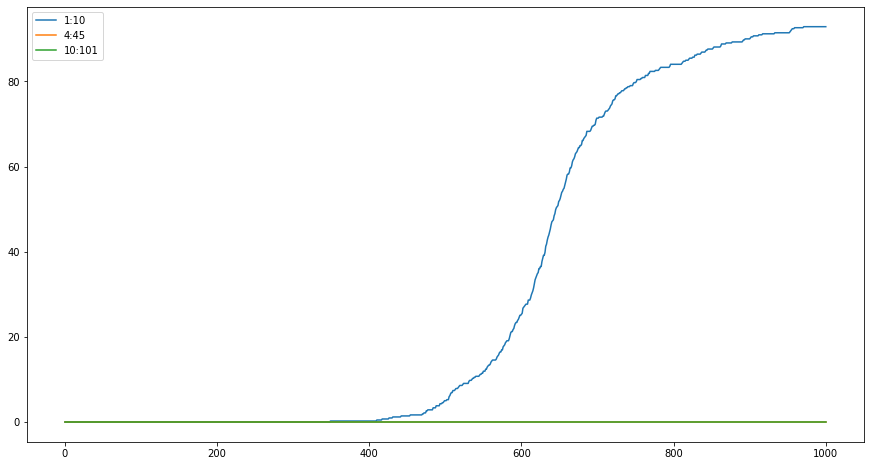

In [34]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper50.step,exper50.CartilageDegrad,label="4:45")
plt.plot(exper153.step,exper153.CartilageDegrad,label="10:101")
plt.legend()

plt.show()

Nous remarquons que la courbe de degradation du cartilage ne change pas dans les deux premiere experiences, car le nombre d'iterations (1000) n'est pas suffisant.

#  2) Infliximab

In [15]:
inflix.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,Dose-Infliximab,Infliximab-Act,...,countIL6,countTNF,count MMPs,countInfliximabs,countMacrophages,count chemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.000000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,100.000000,51.666667,...,8.567326,16.500823,227.436425,94.638503,15.0,111.131283,204.207729,5.019391,0.040300,1.134914
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,81.244543,37.043543,...,24.393216,60.459782,1133.263460,79.190645,0.0,405.367623,816.117154,7.644423,0.966833,8.647776
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,1.000000,0.000000,1.000000,1.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,99.000000,45.000000,...,2.000000,0.000000,7.000000,95.000000,15.0,10.000000,13.000000,1.946108,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,200.000000,100.000000,...,4.000000,6.000000,92.000000,190.000000,15.0,37.000000,49.000000,6.137725,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,200.000000,100.000000,...,262.000000,708.000000,23940.000000,200.000000,15.0,6141.000000,17754.000000,37.724551,59.534081,98.329356


Traiter tout les cas possible sachant qu'on a 3 valeurs pour la dose (1,99,200) et 3 valeurs pour l'activation (10,45,100)

In [17]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=inflix[(inflix.experNumber == 1)]

## cas dose :99 et activation 45 ( experience numero 140) 
exper140=inflix[(inflix.experNumber == 140)]

## cas dose :200 et activation 100 ( experience numero 45) 
exper45=inflix[(inflix.experNumber == 45)]

##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 47) 
exper47=inflix[(inflix.experNumber == 47)]
## cas dose :1 et activation 100 ( experience numero 210) 
exper210=inflix[(inflix.experNumber == 210)]
## cas dose :99 et activation 10 ( experience numero 140) 
exper140=inflix[(inflix.experNumber == 140)]
## cas dose :99 et activation 100 ( experience numero 231) 
exper231=inflix[(inflix.experNumber == 231)]
## cas dose :200 et activation 10 ( experience numero 106) 
exper106=inflix[(inflix.experNumber == 106)]
## cas dose :200 et activation 45 ( experience numero 35) 
exper35=inflix[(inflix.experNumber == 35)]

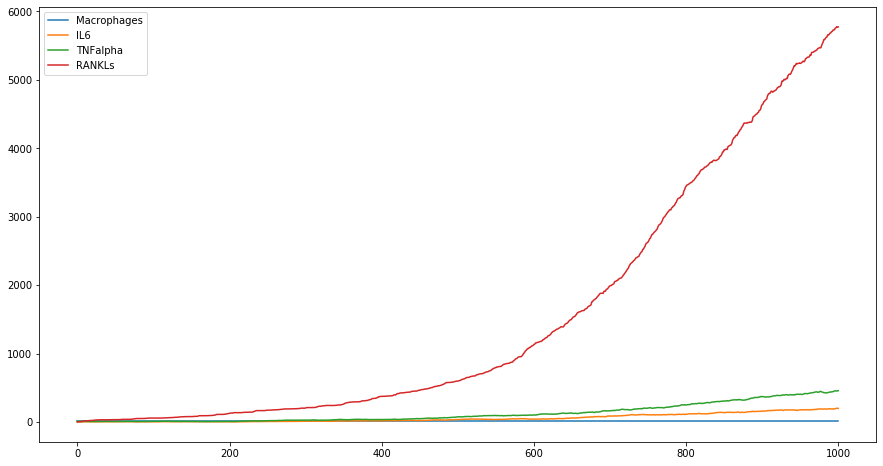

In [18]:
## cas dose :1 et activation 45 ( experience numero 47

plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countMacrophages,label="Macrophages")
plt.plot(exper1.step,exper1.countIL6,label="IL6")
plt.plot(exper1.step,exper1.countTNF,label="TNFalpha")
plt.plot(exper1.step,exper1.countRANKLs,label="RANKLs")
plt.legend()

plt.show()

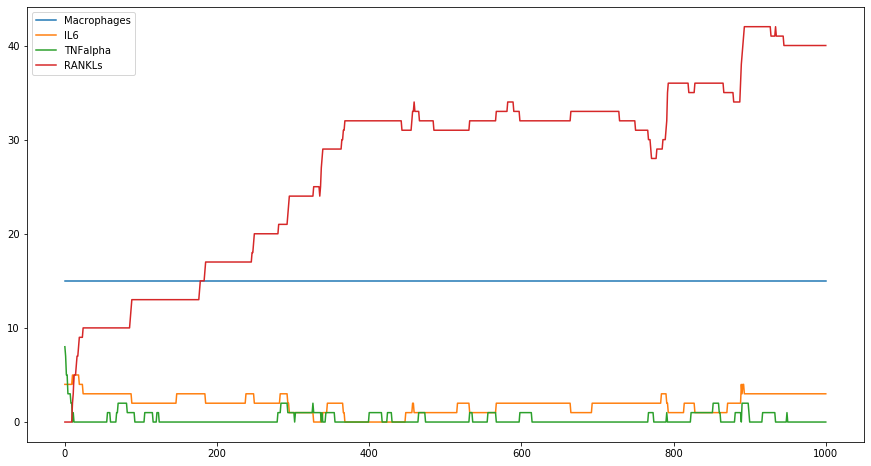

In [19]:
## cas dose :200 et activation 45 ( experience numero 35) 

plt.figure(figsize=(15,8))

plt.plot(exper35.step,exper35.countMacrophages,label="Macrophages")
plt.plot(exper35.step,exper35.countIL6,label="IL6")
plt.plot(exper35.step,exper35.countTNF,label="TNFalpha")
plt.plot(exper35.step,exper35.countRANKLs,label="RANKLs")
plt.legend()

plt.show()

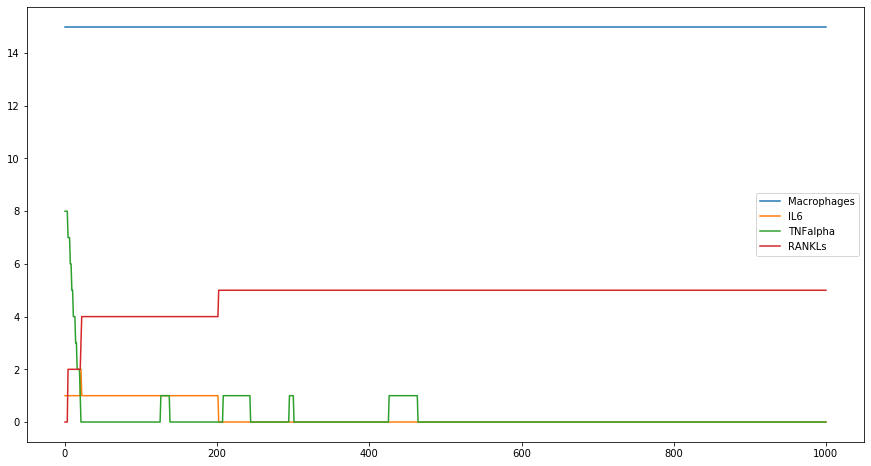

In [20]:
## cas dose :99 et activation 10 ( experience numero 140)

plt.figure(figsize=(15,8))

plt.plot(exper140.step,exper140.countMacrophages,label="Macrophages")
plt.plot(exper140.step,exper140.countIL6,label="IL6")
plt.plot(exper140.step,exper140.countTNF,label="TNFalpha")
plt.plot(exper140.step,exper140.countRANKLs,label="RANKLs")
plt.legend()

plt.show()

# Visualiser la quantite de TNF-alpha des 3 experiences :

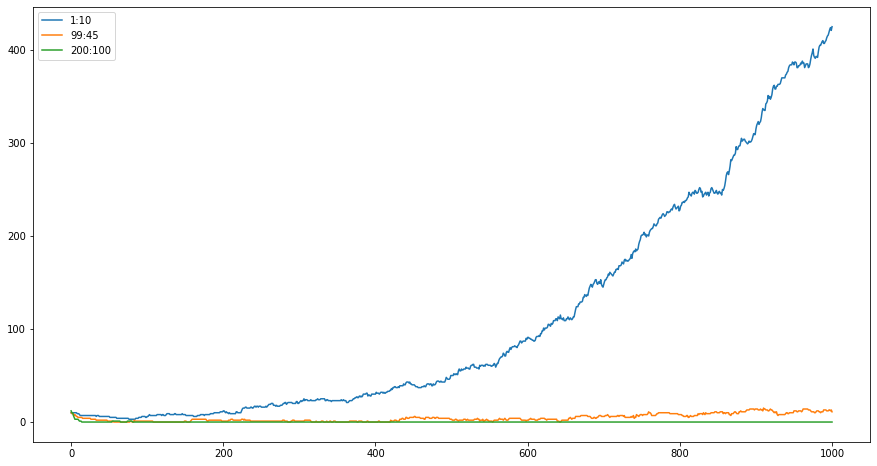

In [17]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countTNF,label="1:10")
plt.plot(exper140.step,exper140.countTNF,label="99:45")
plt.plot(exper45.step,exper45.countTNF,label="200:100")
plt.legend()

plt.show()

# Visualiser l'inflammation pour les 3 experiences

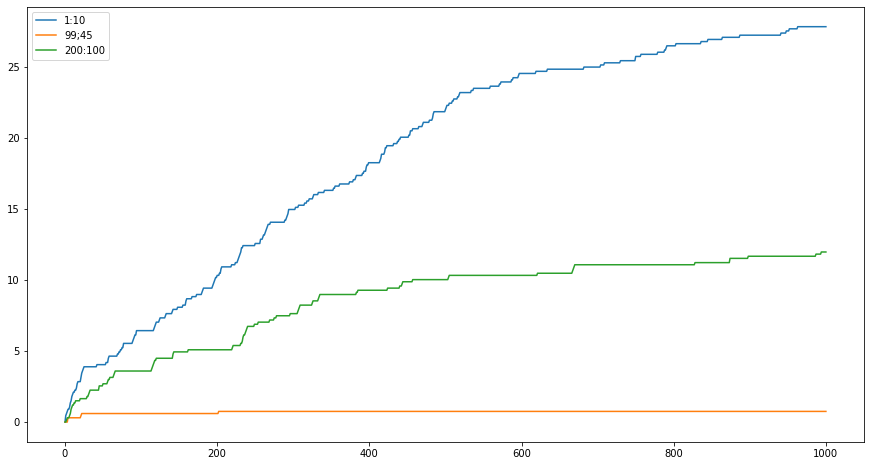

In [21]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper140.step,exper140.MembranDegrad,label="99;45")
plt.plot(exper45.step,exper45.MembranDegrad,label="200:100")
plt.legend()

plt.show()

# Visualiser la degradation de l'OS pour les 3 experiences

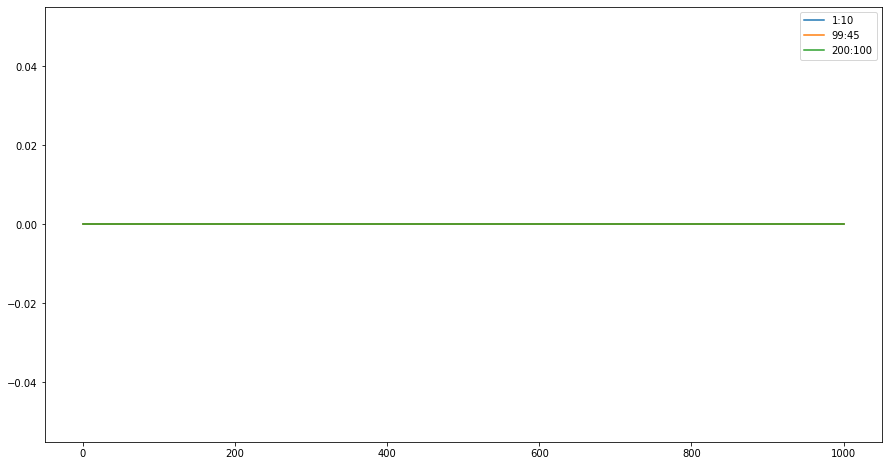

In [24]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper140.step,exper140.OsDegrad,label="99:45")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3gAAAHSCAYAAAC+dmnvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAf+0lEQVR4nO3df7CeZX3n8c9XIkGrIEGigUOXMKGSADXqkR/brrXQKLJCrLAVVseIoa6tjlXXESrdUakdgqKCI7ZDxS7qDrHFH2TlVynW2R2nAgfBVQIYFqg5IUpIEHQdfnrtH+chDeFEEs5JDrnO6zWTOee+7ut5zvUw99zhnft+nlOttQAAALDze9ZULwAAAIDJIfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6MWOqF/B0vPCFL2z777//VC8DAABgStxwww33ttb23nx8pwy8/fffPyMjI1O9DAAAgClRVf863rhbNAEAADoh8AAAADoh8AAAADqxU74HDwAA2Dk98sgjGR0dzYMPPjjVS9kp7LbbbhkaGsqzn/3srZov8AAAgB1mdHQ0z3/+87P//vunqqZ6Oc9orbWsX78+o6OjmTt37lY9xi2aAADADvPggw9mr732Endboaqy1157bdPVToEHAADsUOJu623rfyuBBwAATCtvf/vbM3v27BxyyCHj7r/11ltz5JFHZubMmTnnnHOesO/KK6/MS17yksybNy/Lli3bEcvdJgIPAACYVt72trflyiuv3OL+WbNm5TOf+Uw+8IEPPGH8sccey7ve9a5cccUVWblyZS6++OKsXLlyey93mwg8AABgWnnVq16VWbNmbXH/7Nmz88pXvvJJn1x53XXXZd68eTnggAOy66675qSTTsqll166vZe7TXyKJgAAMCU++j9vzsq7H5jU51ywz+758HEHb/Pj/uZv/iZJ8s53vnOLc9asWZP99ttv4/bQ0FCuvfbabV/kdiTwAACAae/Xhd3jWmtPGnumfWCMwAMAAKbE07nSNpWGhoayevXqjdujo6PZZ599pnBFT+Y9eAAAAFvhla98ZVatWpU777wzDz/8cJYvX57jjz9+qpf1BK7gAQAA08rJJ5+cb3/727n33nszNDSUj370o3nkkUeSjN2q+ZOf/CTDw8N54IEH8qxnPSvnnntuVq5cmd133z2f/exn89rXvjaPPfZY3v72t+fgg59ZVyEFHgAAMK1cfPHFv3b/i1/84oyOjo6779hjj82xxx67PZY1KdyiCQAA0AmBBwAA0AmBBwAA0AmBBwAA0AmBBwAA0AmBBwAA0AmBBwAATCvnnXdeDjnkkBx88ME599xzkyTf//73c+SRR+bQQw/NcccdlwceeGCLj3/sscfyspe9LK9//es3jr3tbW/L3Llzs3DhwixcuDA33XTTdn8d4xF4AADAtPHDH/4wf/u3f5vrrrsu3//+9/PNb34zq1atyqmnnpply5blBz/4Qf7wD/8wn/jEJ7b4HOedd17mz5//pPFPfOITuemmm3LTTTdl4cKF2/NlbJHAAwAApo1bbrklRxxxRJ773OdmxowZ+b3f+718/etfz2233ZZXvepVSZJFixblq1/96riPHx0dzWWXXZZTTz11Ry57q82Y6gUAAADT1BWnJz/5weQ+54sPTV63bIu7DznkkJxxxhlZv359nvOc5+Tyyy/P8PBwDjnkkKxYsSKLFy/OP/zDP2T16tVJkrvvvjunnnpqLr/88iTJe9/73nz84x/Pz3/+8yc99xlnnJEzzzwzRx99dJYtW5aZM2dO7mvbCq7gAQAA08b8+fNz2mmnZdGiRTnmmGPy0pe+NDNmzMgXvvCFnH/++XnFK16Rn//859l1112TJPvss8/GuPvmN7+Z2bNn5xWveMWTnvess87Krbfemuuvvz4bNmzI2WefvUNf1+NcwQMAAKbGr7nStj0tXbo0S5cuTZJ86EMfytDQUA466KD84z/+Y5LkRz/6US677LInPe473/lOVqxYkcsvvzwPPvhgHnjggbzlLW/Jl7/85cyZMydJMnPmzJxyyik555xzdtwL2oQreAAAwLRyzz33JEl+/OMf52tf+1pOPvnkjWO/+tWv8rGPfSzvfOc7n/S4s846K6Ojo7nrrruyfPnyHHXUUfnyl7+cJFm7dm2SpLWWb3zjGznkkEN20Kt5IoEHAABMKyeccEIWLFiQ4447Lueff3723HPPXHzxxfmt3/qtHHTQQdlnn31yyimnJBl7D96xxx77lM/55je/OYceemgOPfTQ3HvvvfmLv/iL7f0yxlWttSn5wRMxPDzcRkZGpnoZAADANrrlllvG/RUDbNl4/82q6obW2vDmc13BAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAApo3Vq1fn93//9zN//vwcfPDBOe+885IkGzZsyKJFi3LggQdm0aJFue+++5KM/eLy97znPZk3b15++7d/O9/73vfGfd4zzjgj++23X573vOc9Yfyhhx7Km970psybNy+HH3547rrrro37zjrrrMybNy8veclLctVVV03K6xN4AADAtDFjxox88pOfzC233JLvfve7Of/887Ny5cosW7YsRx99dFatWpWjjz46y5YtS5JcccUVWbVqVVatWpULLrggf/InfzLu8x533HG57rrrnjR+4YUXZs8998ztt9+e973vfTnttNOSJCtXrszy5ctz880358orr8yf/umf5rHHHpvw6xN4AADAtDFnzpy8/OUvT5I8//nPz/z587NmzZpceumlWbJkSZJkyZIl+cY3vpEkufTSS/PWt741VZUjjjgiP/vZz7J27donPe8RRxyROXPmPGl80+c98cQTc80116S1lksvvTQnnXRSZs6cmblz52bevHnjBuK2mjHhZwAAAHgazr7u7Ny64dZJfc6DZh2U0w47bavm3nXXXbnxxhtz+OGH56c//enGQJszZ07uueeeJMmaNWuy3377bXzM0NBQ1qxZkzlz5mThwoW56aabfu3P2PTxM2bMyB577JH169dnzZo1OeKII570vBPlCh4AADDt/OIXv8gJJ5yQc889N7vvvvsW57XWnjRWVUnylHH36x7/6553IlzBAwAApsTWXmmbbI888khOOOGEvPnNb84b3/jGJMmLXvSirF27NnPmzMnatWsze/bsJGNX1lavXr3xsaOjo9lnn322+mc9/vihoaE8+uijuf/++zNr1qwJP++WuIIHAABMG621LF26NPPnz8/73//+jePHH398LrrooiTJRRddlMWLF28c/+IXv5jWWr773e9mjz32GPe9dluy6fNecsklOeqoo1JVOf7447N8+fI89NBDufPOO7Nq1aocdthhE359Ag8AAJg2vvOd7+RLX/pSvvWtb2XhwoVZuHBhLr/88px++um5+uqrc+CBB+bqq6/O6aefniQ59thjc8ABB2TevHn54z/+43zuc5/b+FwLFy7c+P0HP/jBDA0N5Ze//GWGhobykY98JEmydOnSrF+/PvPmzcunPvWpjZ/OefDBB+eP/uiPsmDBghxzzDE5//zzs8suu0z49dV4934+0w0PD7eRkZGpXgYAALCNbrnllsyfP3+ql7FTGe+/WVXd0Fob3nyuK3gAAACdEHgAAACdEHgAAACdEHgAAMAOtTN+DshU2db/VgIPAADYYXbbbbesX79e5G2F1lrWr1+f3Xbbbasf4xedAwAAO8zQ0FBGR0ezbt26qV7KTmG33XbL0NDQVs8XeAAAwA7z7Gc/O3Pnzp3qZXTLLZoAAACdmJTAq6pjquq2qrq9qk4fZ//MqvrKYP+1VbX/Zvt/s6p+UVUfmIz1AAAATEcTDryq2iXJ+Ulel2RBkpOrasFm05Ymua+1Ni/Jp5Ocvdn+Tye5YqJrAQAAmM4m4wreYUlub63d0Vp7OMnyJIs3m7M4yUWD7y9JcnRVVZJU1RuS3JHk5klYCwAAwLQ1GYG3b5LVm2yPDsbGndNaezTJ/Un2qqrfSHJako8+1Q+pqndU1UhVjfjEHQAAgCebjMCrccY2/6UWW5rz0SSfbq394ql+SGvtgtbacGtteO+9934aywQAAOjbZPyahNEk+22yPZTk7i3MGa2qGUn2SLIhyeFJTqyqjyd5QZJfVdWDrbXPTsK6AAAAppXJCLzrkxxYVXOTrElyUpL/vNmcFUmWJPmXJCcm+VYb+9X1/+HxCVX1kSS/EHcAAABPz4QDr7X2aFW9O8lVSXZJ8oXW2s1VdWaSkdbaiiQXJvlSVd2esSt3J0305wIAAPBENXYhbecyPDzcRkZGpnoZAAAAU6KqbmitDW8+Pim/6BwAAICpJ/AAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6IfAAAAA6MSmBV1XHVNVtVXV7VZ0+zv6ZVfWVwf5rq2r/wfiiqrqhqn4w+HrUZKwHAABgOppw4FXVLknOT/K6JAuSnFxVCzabtjTJfa21eUk+neTswfi9SY5rrR2aZEmSL010PQAAANPVZFzBOyzJ7a21O1prDydZnmTxZnMWJ7lo8P0lSY6uqmqt3dhau3swfnOS3apq5iSsCQAAYNqZjMDbN8nqTbZHB2PjzmmtPZrk/iR7bTbnhCQ3ttYeGu+HVNU7qmqkqkbWrVs3CcsGAADoy2QEXo0z1rZlTlUdnLHbNv/Lln5Ia+2C1tpwa2147733floLBQAA6NlkBN5okv022R5KcveW5lTVjCR7JNkw2B5K8vUkb22t/d9JWA8AAMC0NBmBd32SA6tqblXtmuSkJCs2m7MiYx+ikiQnJvlWa61V1QuSXJbkz1tr35mEtQAAAExbEw68wXvq3p3kqiS3JPn71trNVXVmVR0/mHZhkr2q6vYk70/y+K9SeHeSeUn+W1XdNPgze6JrAgAAmI6qtc3fLvfMNzw83EZGRqZ6GQAAAFOiqm5orQ1vPj4pv+gcAACAqSfwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOiHwAAAAOjEpgVdVx1TVbVV1e1WdPs7+mVX1lcH+a6tq/032/flg/Laqeu1krAcAAGA6mnDgVdUuSc5P8rokC5KcXFULNpu2NMl9rbV5ST6d5OzBYxckOSnJwUmOSfK5wfMBAACwjWZMwnMcluT21todSVJVy5MsTrJykzmLk3xk8P0lST5bVTUYX95aeyjJnVV1++D5/mUS1rVDvffzi3L3r9ZN9TIAAIBJtM+z9s65p1491cvYapNxi+a+SVZvsj06GBt3Tmvt0ST3J9lrKx+bJKmqd1TVSFWNrFsnpAAAADY3GVfwapyxtpVztuaxY4OtXZDkgiQZHh4ed85U2pmqHgAA6NNkXMEbTbLfJttDSe7e0pyqmpFkjyQbtvKxAAAAbIXJCLzrkxxYVXOrateMfWjKis3mrEiyZPD9iUm+1Vprg/GTBp+yOTfJgUmum4Q1AQAATDsTvkWztfZoVb07yVVJdknyhdbazVV1ZpKR1tqKJBcm+dLgQ1Q2ZCwCM5j39xn7QJZHk7yrtfbYRNcEAAAwHdXYhbSdy/DwcBsZGZnqZQAAAEyJqrqhtTa8+fik/KJzAAAApp7AAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6ITAAwAA6MSEAq+qZlXV1VW1avB1zy3MWzKYs6qqlgzGnltVl1XVrVV1c1Utm8haAAAApruJXsE7Pck1rbUDk1wz2H6CqpqV5MNJDk9yWJIPbxKC57TWDkrysiS/U1Wvm+B6AAAApq2JBt7iJBcNvr8oyRvGmfPaJFe31ja01u5LcnWSY1prv2yt/XOStNYeTvK9JEMTXA8AAMC0NdHAe1FrbW2SDL7OHmfOvklWb7I9OhjbqKpekOS4jF0FHFdVvaOqRqpqZN26dRNcNgAAQH9mPNWEqvqnJC8eZ9cZW/kzapyxtsnzz0hycZLPtNbu2NKTtNYuSHJBkgwPD7ctzQMAAJiunjLwWmt/sKV9VfXTqprTWltbVXOS3DPOtNEkr95keyjJtzfZviDJqtbauVu1YgAAAMY10Vs0VyRZMvh+SZJLx5lzVZLXVNWegw9Xec1gLFX1sSR7JHnvBNcBAAAw7U008JYlWVRVq5IsGmynqoar6vNJ0lrbkOQvk1w/+HNma21DVQ1l7DbPBUm+V1U3VdWpE1wPAADAtFWt7XxvZxseHm4jIyNTvQwAAIApUVU3tNaGNx+f6BU8AAAAniEEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcEHgAAQCcmFHhVNauqrq6qVYOve25h3pLBnFVVtWSc/Suq6ocTWQsAAMB0N9EreKcnuaa1dmCSawbbT1BVs5J8OMnhSQ5L8uFNQ7Cq3pjkFxNcBwAAwLQ30cBbnOSiwfcXJXnDOHNem+Tq1tqG1tp9Sa5OckySVNXzkrw/yccmuA4AAIBpb6KB96LW2tokGXydPc6cfZOs3mR7dDCWJH+Z5JNJfvlUP6iq3lFVI1U1sm7duomtGgAAoEMznmpCVf1TkhePs+uMrfwZNc5Yq6qFSea11t5XVfs/1ZO01i5IckGSDA8Pt6382QAAANPGUwZea+0PtrSvqn5aVXNaa2urak6Se8aZNprk1ZtsDyX5dpIjk7yiqu4arGN2VX27tfbqAAAAsM0meovmiiSPfyrmkiSXjjPnqiSvqao9Bx+u8pokV7XW/rq1tk9rbf8kv5vkR+IOAADg6Zto4C1LsqiqViVZNNhOVQ1X1eeTpLW2IWPvtbt+8OfMwRgAAACTqFrb+d7ONjw83EZGRqZ6GQAAAFOiqm5orQ1vPj7RK3gAAAA8Qwg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATgg8AACATlRrbarXsM2qal2Sf53qdYzjhUnunepF0C3HF9uT44vtyfHF9uT4Ynt7ph5j/661tvfmgztl4D1TVdVIa214qtdBnxxfbE+OL7Ynxxfbk+OL7W1nO8bcogkAANAJgQcAANAJgTe5LpjqBdA1xxfbk+OL7cnxxfbk+GJ726mOMe/BAwAA6IQreAAAAJ0QeJOgqo6pqtuq6vaqOn2q18POp6r2q6p/rqpbqurmqvqzwfisqrq6qlYNvu45GK+q+szgmPs/VfXyqX0F7AyqapequrGqvjnYnltV1w6Or69U1a6D8ZmD7dsH+/efynWzc6iqF1TVJVV16+BcdqRzGJOlqt43+Pvxh1V1cVXt5hzG01VVX6iqe6rqh5uMbfP5qqqWDOavqqolU/FaxiPwJqiqdklyfpLXJVmQ5OSqWjC1q2In9GiS/9pam5/kiCTvGhxHpye5prV2YJJrBtvJ2PF24ODPO5L89Y5fMjuhP0tyyybbZyf59OD4ui/J0sH40iT3tdbmJfn0YB48lfOSXNlaOyjJSzN2rDmHMWFVtW+S9yQZbq0dkmSXJCfFOYyn778nOWazsW06X1XVrCQfTnJ4ksOSfPjxKJxqAm/iDktye2vtjtbaw0mWJ1k8xWtiJ9NaW9ta+97g+59n7H+M9s3YsXTRYNpFSd4w+H5xki+2Md9N8oKqmrODl81OpKqGkvzHJJ8fbFeSo5JcMpiy+fH1+HF3SZKjB/NhXFW1e5JXJbkwSVprD7fWfhbnMCbPjCTPqaoZSZ6bZG2cw3iaWmv/K8mGzYa39Xz12iRXt9Y2tNbuS3J1nhyNU0LgTdy+SVZvsj06GIOnZXArycuSXJvkRa21tclYBCaZPZjmuGNbnZvkg0l+NdjeK8nPWmuPDrY3PYY2Hl+D/fcP5sOWHJBkXZK/G9wG/Pmq+o04hzEJWmtrkpyT5McZC7v7k9wQ5zAm17aer56x5zGBN3Hj/YuQjyblaamq5yX5apL3ttYe+HVTxxlz3DGuqnp9kntaazdsOjzO1LYV+2A8M5K8PMlft9ZeluT/5d9ubxqPY4ytNrjtbXGSuUn2SfIbGbttbnPOYWwPWzqenrHHmcCbuNEk+22yPZTk7ilaCzuxqnp2xuLuf7TWvjYY/unjty0Nvt4zGHfcsS1+J8nxVXVXxm4jPypjV/ReMLjdKXniMbTx+Brs3yNPvpUFNjWaZLS1du1g+5KMBZ9zGJPhD5Lc2Vpb11p7JMnXkvz7OIcxubb1fPWMPY8JvIm7PsmBg09y2jVjb/pdMcVrYiczeG/AhUluaa19apNdK5I8/qlMS5Jcusn4Wwef7HREkvsfv60ANtda+/PW2lBrbf+MnaO+1Vp7c5J/TnLiYNrmx9fjx92Jg/nPiH+V5JmptfaTJKur6iWDoaOTrIxzGJPjx0mOqKrnDv6+fPz4cg5jMm3r+eqqJK+pqj0HV5lfMxibcn7R+SSoqmMz9q/huyT5Qmvtr6Z4Sexkqup3k/zvJD/Iv71H6kMZex/e3yf5zYz9BfefWmsbBn/BfTZjb+b9ZZJTWmsjO3zh7HSq6tVJPtBae31VHZCxK3qzktyY5C2ttYeqarckX8rYe0E3JDmptXbHVK2ZnUNVLczYh/jsmuSOJKdk7B+SncOYsKr6aJI3ZexTp29McmrG3u/kHMY2q6qLk7w6yQuT/DRjn4b5jWzj+aqq3p6x/19Lkr9qrf3djnwdWyLwAAAAOuEWTQAAgE4IPAAAgE4IPAAAgE4IPAAAgE4IPAAAgE4IPAAAgE4IPAAAgE4IPAAAgE78f++bVz3Cn38SAAAAAElFTkSuQmCC
plt.plot(exper45.step,exper45.OsDegrad,label="200:100")
plt.legend()

plt.show()

Nous remarquons que la courbe de degradation de l'os est une droite parallele a l'axe des abscisses, ça valeur ne change pas car le nombre d'iterations (1000) n'est pas suffisant.

# Visualiser la degradation du cartilage pour les 3 experiences

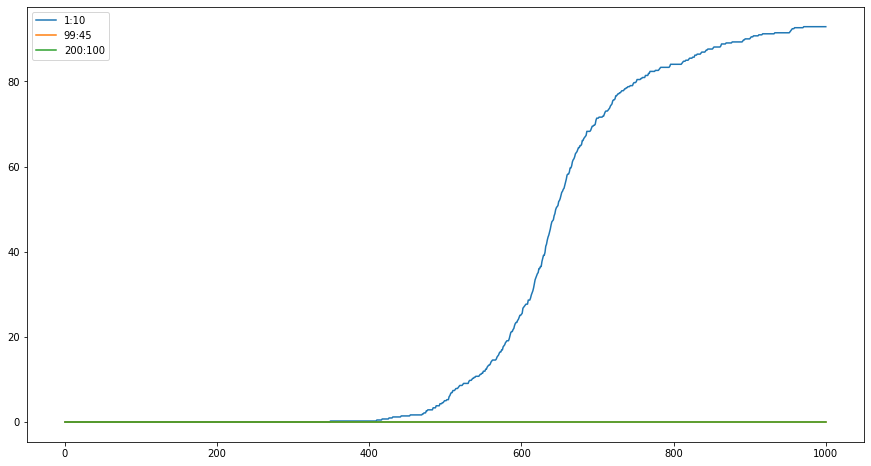

In [32]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper140.step,exper140.CartilageDegrad,label="99:45")
plt.plot(exper45.step,exper45.CartilageDegrad,label="200:100")
plt.legend()

plt.show()

## la dégradation de cartilage est pareille au premier modele car on arreter à 1000 ticks et  la dégradation de
##  cartilage commencera retard ( aprés les 1000 ticks)

Nous remarquons que la courbe de degradation du cartilage ne change pas dans les deux premiere experiences, car le nombre d'iterations (1000) n'est pas suffisant.

# 3) Tolizumab :

In [21]:
toliz.describe()

,experNumber,MacroAct,FibroAct,OsteocAct,ChondroAct,nb-fibroblaste,nbMacrophage,nb-osteoclaste,Dose-tolizumab,Tolizumab-Act,...,countIL6,countTNF,countMMPs,countTolizumabs,countMacrophages,countChemokines,countRANKLs,MembranDegrad,OsDegrad,CartilageDegrad
count,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.0,729729.0,729729.000000,729729.000000,...,729729.000000,729729.000000,729729.000000,729729.000000,729729.0,729729.000000,729729.000000,729729.000000,729729.000000,729729.000000
mean,365.000000,51.666667,51.666667,51.666667,51.666667,668.0,15.0,40.0,50.000000,51.666667,...,6.296669,14.669317,182.966878,2.037432,15.0,92.881526,168.087949,4.456767,0.025329,1.059064
std,210.444119,37.043543,37.043543,37.043543,37.043543,0.0,0.0,0.0,40.422794,37.043543,...,22.934294,55.723161,1111.927548,9.006270,0.0,386.925255,773.735704,6.957963,0.586070,8.304312
min,1.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,10.000000,10.000000,10.000000,10.000000,668.0,15.0,40.0,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,45.000000,45.000000,45.000000,45.000000,668.0,15.0,40.0,49.000000,45.000000,...,0.000000,0.000000,4.000000,0.000000,15.0,0.000000,0.000000,2.095808,0.000000,0.000000
75%,547.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,100.000000,100.000000,...,2.000000,6.000000,52.000000,0.000000,15.0,13.000000,16.000000,4.940120,0.000000,0.000000
max,729.000000,100.000000,100.000000,100.000000,100.000000,668.0,15.0,40.0,100.000000,100.000000,...,250.000000,711.000000,31191.000000,100.000000,15.0,5146.000000,14314.000000,36.676647,39.603106,95.465394


Traiter tous les cas possible sachant qu'on a 3 valeurs pour la dose (1,49,100) et 3 valeurs pour l'activation (10,45,101)

In [22]:
## cas dose :1 et activation 10 ( experience numero 1) 
exper1=toliz[(toliz.experNumber == 1)]
## cas dose :49 et activation 45 ( experience numero 23) 
exper23=toliz[(toliz.experNumber == 23)]
## cas dose :100 et activation 100 ( experience numero 243) 
exper243=toliz[(toliz.experNumber == 243)]


##Pour les autres cas :

## cas dose :1 et activation 45 ( experience numero 101) 
exper101=toliz[(toliz.experNumber == 101)]
## cas dose :1 et activation 100 ( experience numero 57) 
exper57=toliz[(toliz.experNumber == 57)]
## cas dose :49 et activation 10 ( experience numero 40) 
exper40=toliz[(toliz.experNumber == 40)]
## cas dose :49 et activation 100 ( experience numero 294) 
exper294=toliz[(toliz.experNumber == 294)]
## cas dose :100 et activation 10 ( experience numero 16) 
exper16=toliz[(toliz.experNumber == 16)]
## cas dose :100 et activation 45 ( experience numero 179) 
exper179=toliz[(toliz.experNumber == 179)]

# Experience 1:

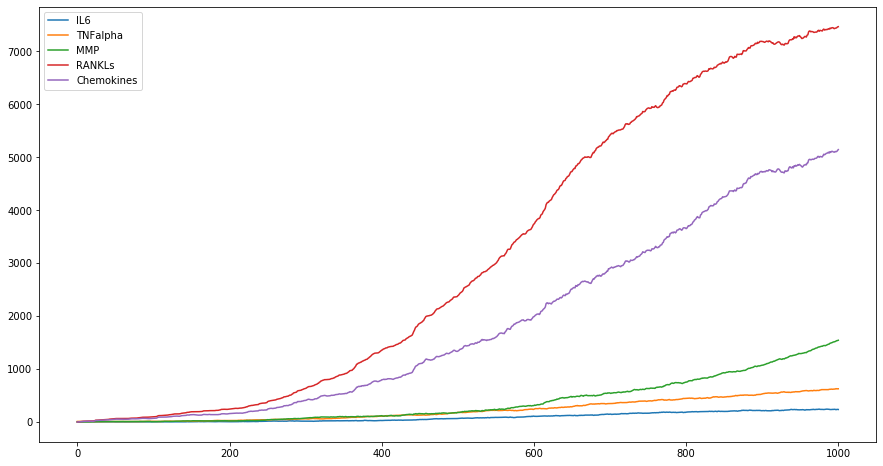

In [23]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.countIL6,label="IL6")
plt.plot(exper1.step,exper1.countTNF,label="TNFalpha")
plt.plot(exper1.step,exper1.countMMPs,label="MMP")

plt.plot(exper1.step,exper1.countRANKLs,label="RANKLs")
plt.plot(exper1.step,exper1.countChemokines,label="Chemokines")
plt.legend()

plt.show()

# Experience 23:

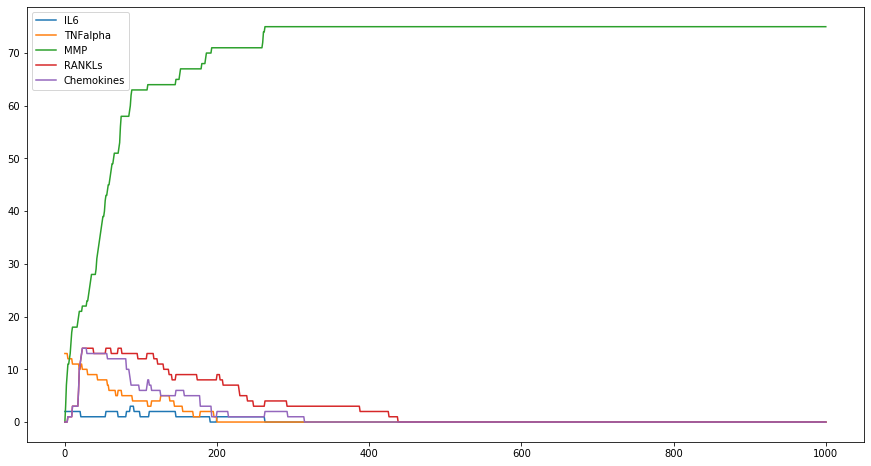

In [24]:
plt.figure(figsize=(15,8))

plt.plot(exper23.step,exper23.countIL6,label="IL6")
plt.plot(exper23.step,exper23.countTNF,label="TNFalpha")
plt.plot(exper23.step,exper23.countMMPs,label="MMP")

plt.plot(exper23.step,exper23.countRANKLs,label="RANKLs")
plt.plot(exper23.step,exper23.countChemokines,label="Chemokines")
plt.legend()

plt.show()

# Experience 243:

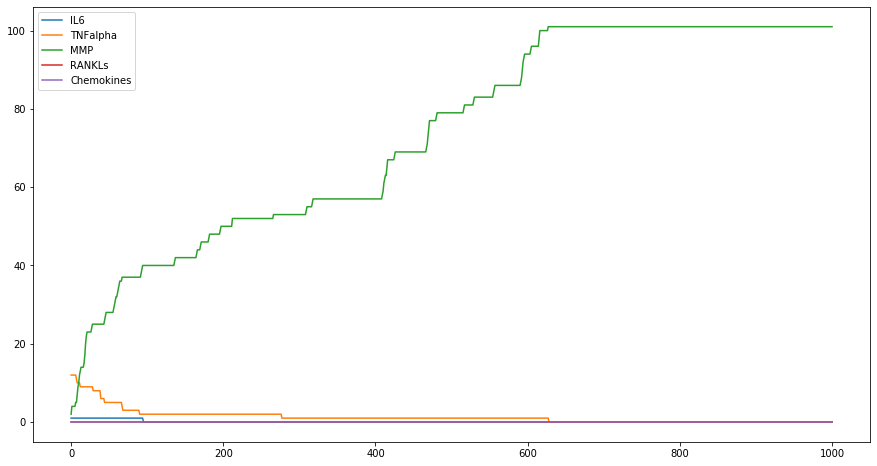

In [25]:
plt.figure(figsize=(15,8))

plt.plot(exper243.step,exper243.countIL6,label="IL6")
plt.plot(exper243.step,exper243.countTNF,label="TNFalpha")
plt.plot(exper243.step,exper243.countMMPs,label="MMP")

plt.plot(exper243.step,exper243.countRANKLs,label="RANKLs")
plt.plot(exper243.step,exper243.countChemokines,label="Chemokines")
plt.legend()

plt.show()

# Visualiser l'inflammation pour les 3 experiences

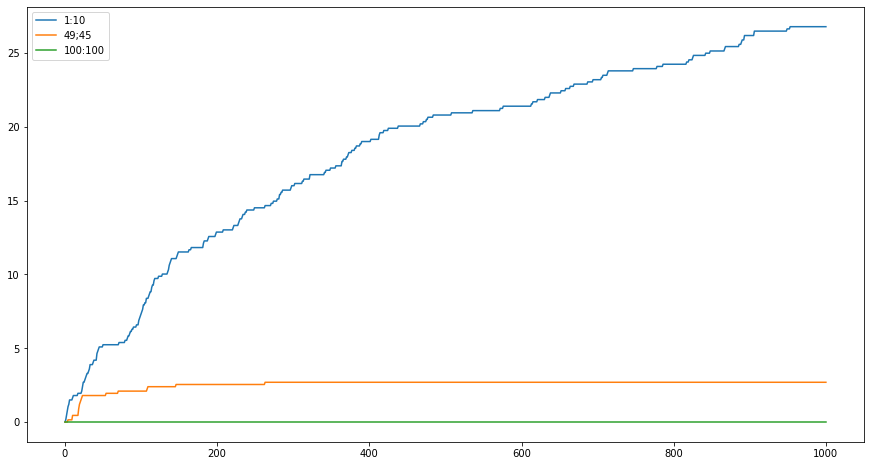

In [26]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.MembranDegrad,label="1:10")
plt.plot(exper23.step,exper23.MembranDegrad,label="49;45")
plt.plot(exper243.step,exper243.MembranDegrad,label="100:100")
plt.legend()

plt.show()

# Visualiser la degradation de l'OS pour les 3 experiences

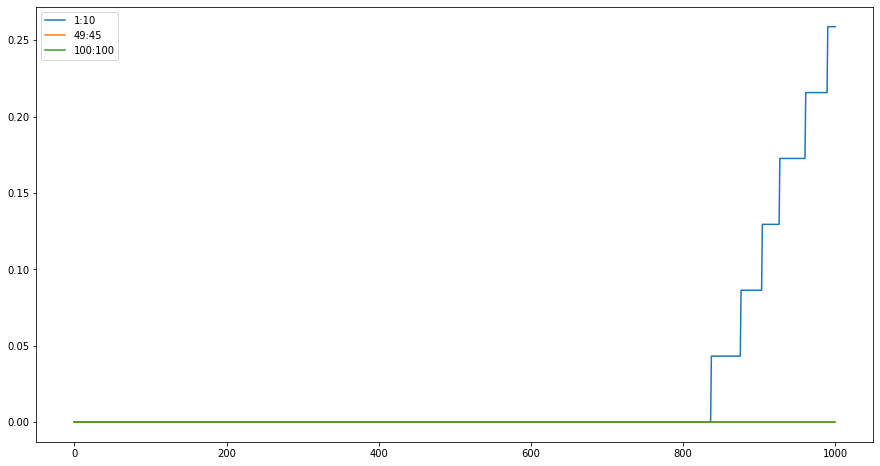

In [27]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.OsDegrad,label="1:10")
plt.plot(exper23.step,exper23.OsDegrad,label="49:45")
plt.plot(exper243.step,exper243.OsDegrad,label="100:100")
plt.legend()

plt.show()

# Visualiser la degradation du cartilage pour les 3 experiences

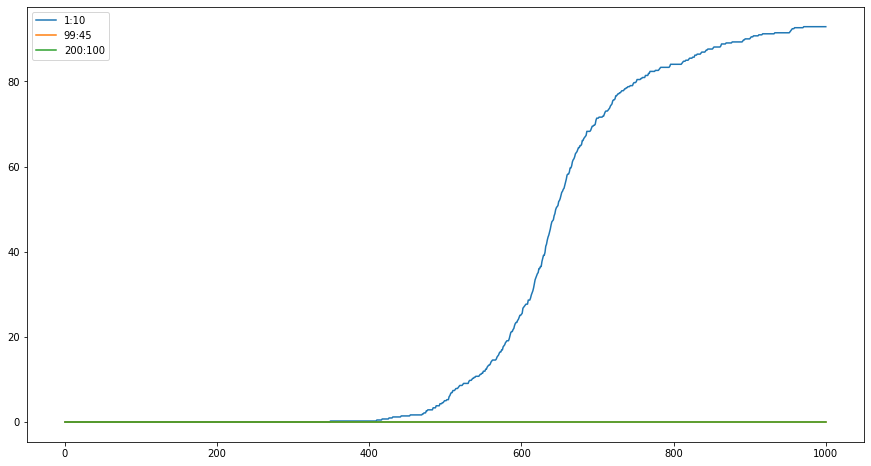

In [30]:
plt.figure(figsize=(15,8))

plt.plot(exper1.step,exper1.CartilageDegrad,label="1:10")
plt.plot(exper23.step,exper23.CartilageDegrad,label="99:45")
plt.plot(exper243.step,exper243.CartilageDegrad,label="200:100")
plt.legend()

plt.show()

Nous remarquons que la courbe de degradation du cartilage ne change pas dans les deux premiere experiences, car le nombre d'iterations (1000) n'est pas suffisant.